In [ ]:
IBM cloud deployment

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 588.3 MB 27 kB/s /s eta 0:00:01
     |████████████████████████████████| 14.1 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 79.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 88.2 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 104.7 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found ex

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-19 06:47:35.994208: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 06:47:36.599033: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 06:47:36.599140: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /op

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

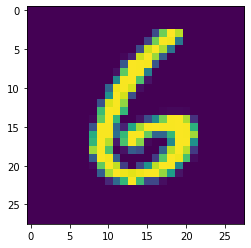

In [6]:
plt.imshow(x_train[6000])     #ploting the index=image

In [7]:
np.argmax(y_train[6000])

0

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [11]:
#create model
model = Sequential ()

2022-11-19 06:52:05.563615: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 06:52:05.563649: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [18]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.1254 - val_accuracy: 0.9758
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.1234 - val_accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.1321 - val_accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.1447 - val_accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.1960 - val_accuracy: 0.9774


In [19]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.1959923654794693, 0.977400004863739]


In [20]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 68ms/step
[[2.0200181e-19 2.0753469e-22 5.1415566e-20 1.0619057e-11 1.1704054e-06
  1.1751160e-10 5.2974767e-24 4.7444288e-08 3.1426284e-09 9.9999881e-01]]


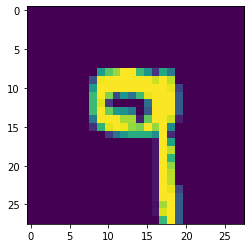

In [21]:
plt.imshow(x_test[6000])

In [22]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [23]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [24]:
# Save the model
model.save('models/mnistCNN.h5')

In [25]:
cd models

/home/wsuser/work/models


In [26]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [27]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 24.2 MB/s eta 0:00:01


In [35]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"1fwhQIrxfhFHiQ_NQPt4SLjgskPsS6M9xR0g1qN0Dcbv"
}
client = APIClient(credentials)
client

In [36]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'deploye',
    'scope': {'bss_account_id': 'd239b6112b9342d9a5106f7c105a5504'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'c1adeffc-ccae-47ad-b962-e35842626e29',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'f446a07f5f6d420d8dd2782cfc231124',
        'api_key': 'HqsuHExEnUHoBkxKhnQY3_X41tuub8WsFywIPeCBxBTq',
        'secret_access_key': 'cd6549d58271b7d6a4b014ee2cee3985d5fecc45ab8c853e',
        'service_id': 'ServiceId-973a90a2-2572-4d91-82d9-457813b00e13'},
       'editor': {'access_key_id': '5741816cf6fd419ea38b3071077abb35',
        'api_key': 'dIqAR-58Tzv2gNvZyYYswU8HBR9UU9C4dttV77lr_0c_',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/d239b6112b9342d9a5106f7c105a5504:525c3273-b57a-42e3-8e67-71b7285870df::',
        'secret_access_key': '9f7c281ed231844f6fe50b4472f9599ac5c1cdfc9

In [37]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client,'digit')
print("Space UID = " + space_uid)

Space UID = e23deb66-ce38-4749-80c4-2ade2faea91d


In [40]:
client.set.default_space(space_uid)

'SUCCESS'

In [41]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [42]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [43]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T08:23:07.876Z',
  'id': '107a27d8-06aa-4e04-9d97-59cb740395cf',
  'modified_at': '2022-11-19T08:23:10.441Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-667000707U',
  'resource_key': '0b0d001b-95bb-423a-a9b3-5dc16c14a296',
  'space_id': 'e23deb66-ce38-4749-80c4-2ade2faea91d'},
 'system': {'warnings': []}}

In [45]:
model_id = client.repository.get_model_id(model_details)
model_id

'107a27d8-06aa-4e04-9d97-59cb740395cf'

In [46]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [47]:
ls

DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


In [48]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [49]:
model = load_model("mnistCNN.h5")

In [52]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [53]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [54]:
img

In [55]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [56]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 46ms/step
[[1.0000000e+00 1.2945109e-30 1.0741741e-23 2.3742152e-28 2.2745019e-32
  6.5811584e-26 1.0669472e-20 1.0686200e-30 3.2100360e-16 2.8342924e-18]]


In [57]:
print(np.argmax(pred, axis=1)) #printing our Labels

[0]
